In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
from scipy.stats import linregress

In [2]:
f = 'data_examples/3_11_16_elisa.xlsx'
s2 = 'Sheet2'
s1 = 'Sheet1'

In [3]:
plate = pd.read_excel(f,s2, header=23, index_col=0)#, skip_footer=60)#, index_col=0)
plate = plate.ix['A':'H']
labels = pd.read_excel(f,s1, index_col = 0)
labels = labels.loc['A':'D', 9:12]
stds = np.array([500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0])

plate#.loc['A':'D', 9:12]

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,0.2424,0.2398,0.2157,0.2098,0.3388,0.3497,0.3701,0.3706,0.1023,0.1026,0.1067,0.0990
B,0.1432,0.1457,0.1284,0.1287,0.2049,0.2136,0.2202,0.2231,0.0904,0.0934,0.0945,0.1520
C,0.112,0.1063,0.0951,0.0966,0.1334,0.1359,0.1373,0.1482,0.0871,0.0886,0.0914,0.0871
D,0.085,0.0849,0.0820,0.082,0.0989,0.1030,0.1120,0.1175,0.0878,0.0899,0.0928,0.0909
E,0.0772,0.0783,0.0755,0.0773,0.0837,0.0881,0.0964,0.1008,0.0894,0.0929,0.0939,0.0912
F,0.0709,0.0732,0.0716,0.0719,0.0761,0.0827,0.0838,0.0892,0.0898,0.0901,0.0914,0.0900
G,0.0747,0.0689,0.0700,0.0689,0.0727,0.0760,0.0828,0.0884,0.0887,0.0931,0.0963,0.0954
H,0.0741,0.0703,0.0714,0.0966,0.0708,0.0752,0.0796,0.0852,0.0887,0.0923,0.0948,0.0985


In [122]:
data_dict = {21:{'J':None,'B':None,'M':None,'A':None},
             22:{'J':None,'B':None,'M':None,'A':None},
             4361:{'J':None,'B':None,'M':None,'A':None},
             4362:{'J':None,'B':None,'M':None,'A':None}}

for col in labels.columns:
    for index in labels.index:
        sub = re.match(r'\d+', labels[col][index])
        lab = labels[col][index][-1]
        sub = int(sub.group())
        data_dict[sub][lab] = plate[col][index]
        
samples = pd.DataFrame(data_dict)
samples = samples.reindex(['J', 'B', 'M','A'])
samples.columns = ['2 D1', '2 D2', '436 D1', '436 D2']
samples

,2 D1,2 D2,436 D1,436 D2
J,0.1520,0.0904,0.0871,0.0871
B,0.1026,0.0928,0.0934,0.1067
M,0.0886,0.0945,0.0914,0.0899
A,0.0909,0.0990,0.0878,0.1023


In [131]:
# removed outliers

plate[4]['H'] = np.nan

In [132]:
# plate with removed outliers

plate

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,0.2424,0.2398,0.2157,0.2098,0.3388,0.3497,0.3701,0.3706,0.1023,0.1026,0.1067,0.0990
B,0.1432,0.1457,0.1284,0.1287,0.2049,0.2136,0.2202,0.2231,0.0904,0.0934,0.0945,0.1520
C,0.112,0.1063,0.0951,0.0966,0.1334,0.1359,0.1373,0.1482,0.0871,0.0886,0.0914,0.0871
D,0.085,0.0849,0.0820,0.082,0.0989,0.1030,0.1120,0.1175,0.0878,0.0899,0.0928,0.0909
E,0.0772,0.0783,0.0755,0.0773,0.0837,0.0881,0.0964,0.1008,0.0894,0.0929,0.0939,0.0912
F,0.0709,0.0732,0.0716,0.0719,0.0761,0.0827,0.0838,0.0892,0.0898,0.0901,0.0914,0.0900
G,0.0747,0.0689,0.0700,0.0689,0.0727,0.0760,0.0828,0.0884,0.0887,0.0931,0.0963,0.0954
H,0.0741,0.0703,0.0714,NaN,0.0708,0.0752,0.0796,0.0852,0.0887,0.0923,0.0948,0.0985


In [133]:
# isolated each curve and found mean OD

acsf_BSA = plate[[1,2]].mean(axis=1)
acsf = plate[[3,4]].mean(axis=1)
BS = plate[[5,6]].mean(axis=1)
BS_BSA = plate[[7,8]].mean(axis=1)

In [134]:
# subtract average blank of each curve

acsf_BSA_bs = acsf_BSA.sub(acsf_BSA['H'])
acsf_bs = acsf.sub(acsf['H'])
BS_bs = BS.sub(BS['H'])
BS_BSA_bs = BS_BSA.sub(BS_BSA['H'])

In [135]:
# combine each blank subtracted curve into one table

bs_stds = pd.concat([acsf_BSA_bs, acsf_bs, BS_bs, BS_BSA_bs], axis=1)
bs_stds.columns = ['acsf_BSA', 'acsf', 'BS', 'BS_BSA']

bs_stds

,acsf_BSA,acsf,BS,BS_BSA
<>,,,,
A,0.16890,0.14135,0.27125,0.28795
B,0.07225,0.05715,0.13625,0.13925
C,0.03695,0.02445,0.06165,0.06035
D,0.01275,0.01060,0.02795,0.03235
E,0.00555,0.00500,0.01290,0.01620
F,-0.00015,0.00035,0.00640,0.00410
G,-0.00040,-0.00195,0.00135,0.00320
H,0.00000,0.00000,0.00000,0.00000


In [136]:
# perform linear regression on each curve to determine line of best fit and R^2 value

linreg_df = pd.DataFrame([linregress(stds, acsf_BSA_bs),
                          linregress(stds, acsf_bs),
                          linregress(stds, BS_bs),
                          linregress(stds, BS_BSA_bs)],
                         columns = ['m','b','r','p','sem'],
                         index = ['acsf_BSA', 'acsf', 'BS', 'BS_BSA'])

linreg_df['r**2'] = linreg_df['r'] ** 2


# make variables for each lines m and b values
mb = linreg_df[['m','b']]

mAB, bAB = mb.ix['acsf_BSA']
mA, bA = mb.ix['acsf']
mB, bB = mb.ix['BS']
mBB, bBB = mb.ix['BS_BSA']

In [137]:
# table with linear regression results
linreg_df

,m,b,r,p,sem,r**2
acsf_BSA,0.000340,-0.005137,0.997606,3.423038e-08,0.000010,0.995218
acsf,0.000283,-0.005443,0.995185,2.780194e-07,0.000011,0.990394
BS,0.000549,-0.003376,0.999674,8.650024e-11,0.000006,0.999348
BS_BSA,0.000578,-0.003775,0.999283,9.217363e-10,0.000009,0.998566


In [138]:
# isolate which samples have and dont have BSA
sam_no = samples[['2 D1', '2 D2']]
sam_bsa = samples[['436 D1', '436 D2']]

,2 D1,2 D2,436 D1,436 D2
J,0.1520,0.0904,0.0871,0.0871
B,0.1026,0.0928,0.0934,0.1067
M,0.0886,0.0945,0.0914,0.0899
A,0.0909,0.0990,0.0878,0.1023


In [141]:
#display total mean of samples w/o BSA
sam_no.mean(axis=1).mean()

0.10134999919682741

In [142]:
#display total mean of samples with BSA
sam_bsa.mean(axis=1).mean()

0.0932125011458993

##### .07 units difference in ocular density between no BSA and BSA samples

In [147]:
#subtract each curves blank values from sample values making, a table for each
sam_A_bs = samples.sub(acsf['H'])
sam_B_bs = samples.sub(BS['H'])
sam_AB_bs = samples.sub(BS['H'])
sam_BB_bs = samples.sub(BS_BSA['H'])

In [148]:
#find BDNF values for each sample based on each curve
all_A = sam_A_bs.sub(bA).div(mA)
all_B = sam_B_bs.sub(bB).div(mB)
all_AB = sam_AB_bs.sub(bAB).div(mAB)
all_BB = sam_BB_bs.sub(bBB).div(mBB)

# find BDNF values for each diluent based on if they have BSA or not
same_dil_acsf = pd.concat([all_A[['2 D1', '2 D2']], all_AB[['436 D1', '436 D2']]], axis=1)
same_dil_BSA = pd.concat([all_B[['2 D1', '2 D2']], all_BB[['436 D1', '436 D2']]], axis=1)

In [157]:
# function to graph the different sample tables
def graph_bdnf(df):
    fig, ax = plt.subplots(figsize=(8,6))
    
    x=[0,1,2,3]
    labels=['J','B','M','A']

    for bdnf in df.columns:
        ax.plot(x, df[bdnf])
    
    ax.legend()
    ax.set_xlim([-.1, 3.1])
    ax.xaxis.set_ticks([0,1,2,3])
    ax.set_xticklabels(labels)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylabel('BDNF (pg/ml)')
    ax.set_xlabel('microdialysis timepoint')

# Standards

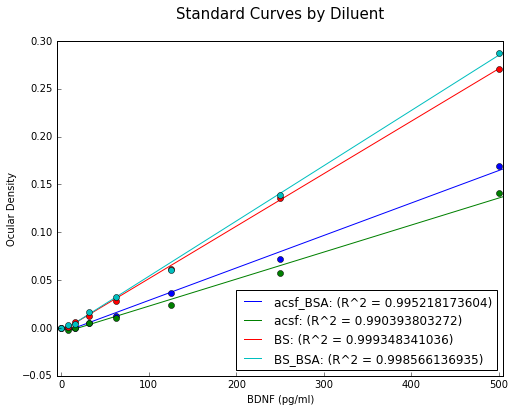

In [158]:
#graph all standard values and their regression lines
fig, ax = plt.subplots(figsize= (8, 6))

c = ['b', 'g', 'r', 'c']
rr = []

for column, reg, color in zip(bs_stds.columns, linreg_df.index, c):
    x = bs_stds[column].sub(linreg_df.ix[reg]['b']).div(linreg_df.ix[reg]['m'])
    rr.append((column, linreg_df.ix[reg]['r**2']))
    plt.plot(x, bs_stds[column], c = color)

ax.plot(stds, bs_stds, 'o')
ax.legend(labels=['%s: (R^2 = %s)' % (x[0],x[1]) for x in rr], loc = 4)
ax.set_xlim([-5, 505])
ax.set_title('Standard Curves by Diluent\n', fontsize=15)
ax.set_ylabel('Ocular Density')
ax.set_xlabel('BDNF (pg/ml)')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Samples

### Plotted on aCSF Curve

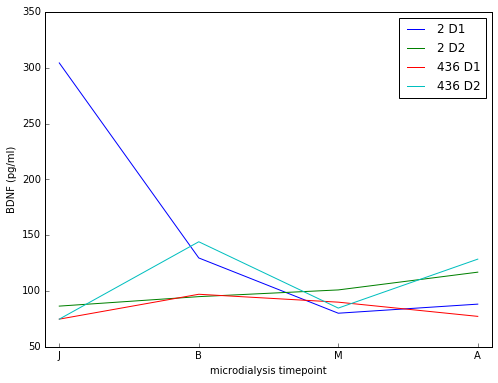

In [159]:
graph_bdnf(all_A)

In [160]:
all_A

,2 D1,2 D2,436 D1,436 D2
J,304.359411,86.461738,74.788633,74.788633
B,129.616794,94.951244,97.073634,144.119734
M,80.094595,100.964651,89.999019,84.693084
A,88.230365,116.882509,77.264759,128.555613


### Plotted on Block & Sample curve

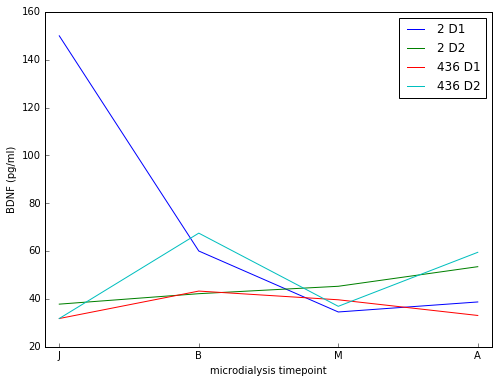

In [161]:
graph_bdnf(all_B)

In [162]:
all_B

,2 D1,2 D2,436 D1,436 D2
J,150.034548,37.839553,31.829099,31.829099
B,60.059989,42.210779,43.303593,67.527518
M,34.561126,45.307068,39.660890,36.928877
A,38.750215,53.503135,33.104050,59.513589


### Plotted on aCSF + BSA Curve

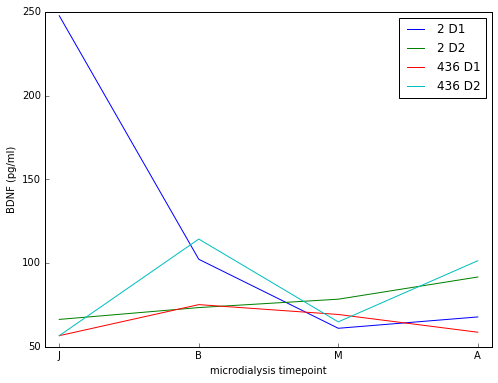

In [163]:
graph_bdnf(all_AB)

In [164]:
all_AB

,2 D1,2 D2,436 D1,436 D2
J,247.753585,66.363687,56.646359,56.646359
B,102.288308,73.430815,75.197608,114.361346
M,61.063330,78.436703,69.308313,64.891363
A,67.835989,91.687595,58.707621,101.404923


### Plotted on Block & Sample + BSA Curve

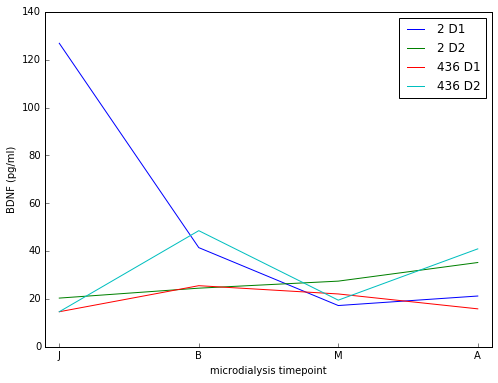

In [165]:
graph_bdnf(all_BB)

In [166]:
all_BB

,2 D1,2 D2,436 D1,436 D2
J,126.920765,20.368035,14.659846,14.659846
B,41.471010,24.519434,25.557290,48.562999
M,17.254480,27.460011,22.097778,19.503157
A,21.232900,35.243899,15.870680,40.952089


### 2 on aCSF, 436 on aCSF+BSA

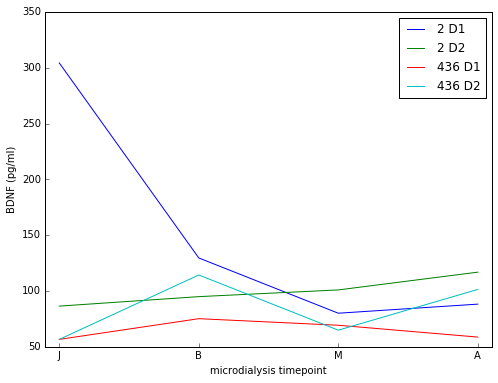

In [167]:
graph_bdnf(same_dil_acsf)

In [168]:
same_dil_acsf

,2 D1,2 D2,436 D1,436 D2
J,304.359411,86.461738,56.646359,56.646359
B,129.616794,94.951244,75.197608,114.361346
M,80.094595,100.964651,69.308313,64.891363
A,88.230365,116.882509,58.707621,101.404923


### 2 on Block & Sample, 426 on Block and Sample + aCSF

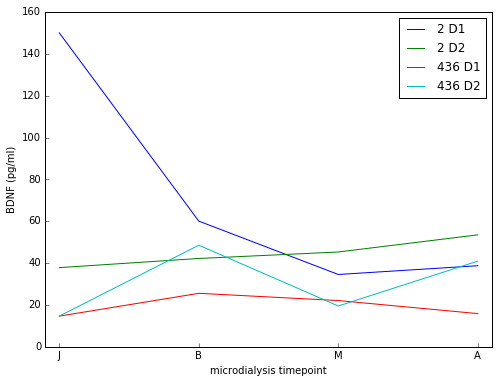

In [169]:
graph_bdnf(same_dil_BSA)

In [170]:
same_dil_BSA

,2 D1,2 D2,436 D1,436 D2
J,150.034548,37.839553,14.659846,14.659846
B,60.059989,42.210779,25.557290,48.562999
M,34.561126,45.307068,22.097778,19.503157
A,38.750215,53.503135,15.870680,40.952089
